<a href="https://colab.research.google.com/github/woominhee/Everyones-Deep-Learning/blob/main/ch11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11장 데이터 다루기

## 3. 판다스를 활용한 데이터 조사

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 깃허브에 준비된 데이터를 가져온다.
!git clone https://github.com/taehojo/data.git

# 피마 인디언 당뇨병 데이터셋을 불러온다.
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), 460.93 KiB | 1.81 MiB/s, done.


In [3]:
# 처음 5줄
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 정상과 당뇨 환자가 각각 몇 명씩인지 조사한다.
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [5]:
# 각 정보별 특징을 좀 더 자세히 출력한다.
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 각 항목이 어느 정도의 상관 관계를 가지고 있는지 본다.
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


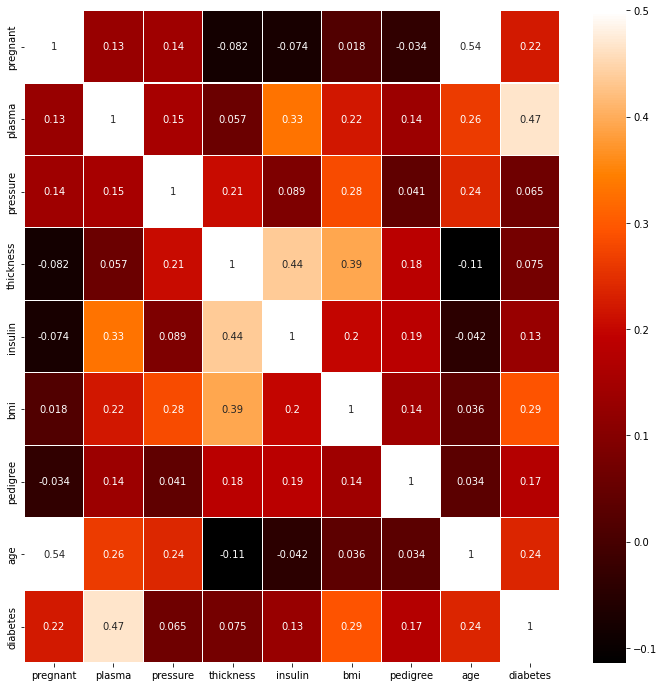

In [7]:
# 데이터 간의 상관 관계를 그래프로 표현
colormap = plt.cm.gist_heat   # 그래프의 색상 구성을 정한다.
plt.figure(figsize=(12,12))   # 그래프의 크기를 정한다.

# 그래프의 속성 결정. vmax의 값을 0.5로 지정해 0.5에 가까울수록 밝은색으로 표시되게 한다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

## 4. 중요한 데이터 추출하기

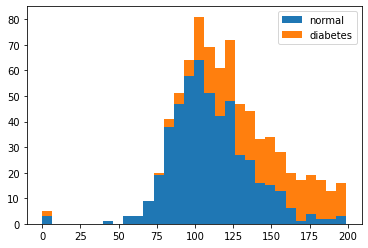

In [11]:
import warnings
warnings.filterwarnings("ignore") # 경고 메시지를 숨긴다.

# plasma를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 본다. 
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

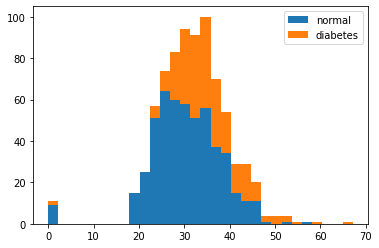

In [12]:
# BMI를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 본다.
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

## 5. 피마 인디언 당뇨병 예측 실행

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd

# 깃허브에 준비된 데이터를 가져온다. 이미 앞에서 가져왔으므로 주석 처리한다.
# !git clone https://github.com/taehojo/data.git

# 피마 인디언 당뇨병 데이터셋을 불러온다.
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

In [15]:
# 세부 정보를 X로 지정
X = df.iloc[:,0:8]
# 당뇨병 여부를 y로 지정
y = df.iloc[:,8]

In [20]:
# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid',name='Dense_3'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 9.2742 - accuracy: 0.4635
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 1.6854 - accuracy: 0.6406
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 1.0563 - accuracy: 0.6536
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.8446 - accuracy: 0.6445
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7677 - accuracy: 0.6576
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy: 0.6641
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.6654
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.6771
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.6706
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6694 - accura